In [1]:
import os
from tqdm import tqdm

import cv2
import matplotlib.pyplot as plt

In [12]:
def showImageAndDrawMatches(model, img1, img2, min_index=0, max_index=25):
    keypoints1, descriptors1 = model.detectAndCompute(img1, None)
    keypoints2, descriptors2 = model.detectAndCompute(img2, None)

    print("#keypoints1: {0}\n#keyoints2: {1}".format(len(keypoints1), len(keypoints2)))

    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

    matches = bf.match(descriptors1, descriptors2)
    # matches = sorted(matches, key = lambda x: x.distance)

    print("#matches/#keypoints1: {0}\n#matches/#keyoints 2: {1}".format(len(matches)/len(keypoints1), len(matches)/len(keypoints2)))

    img3 = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[min_index:max_index], img2, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.figure(figsize=(32,16))
    plt.imshow(img3)

In [3]:
# BFMatcher with default params
# bf = cv2.BFMatcher()
# matches = bf.knnMatch(descriptors1, descriptors2, k=2)
# # Apply ratio test
# good = []
# for m,n in matches:
#     if m.distance < 0.75*n.distance:
#         good.append([m])
# # cv.drawMatchesKnn expects list of lists as matches.
# img3 = cv2.drawMatchesKnn(imgLeft, keypoints1, imgRight, keypoints2, good[:10],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# plt.figure(figsize=(32,16))
# plt.imshow(img3)

In [4]:
f = []
for (dirpath, dirnames, filenames) in os.walk(os.path.join("images", "left")):
    f.extend(filenames)
    break
len(f)

2776

In [5]:
from IPython.display import clear_output

In [56]:
models = [cv2.SIFT_create(), cv2.ORB_create()]

#keypoints1: 1360
#keyoints2: 1351
#matches/#keypoints1: 0.5617647058823529
#matches/#keyoints 2: 0.5655070318282753


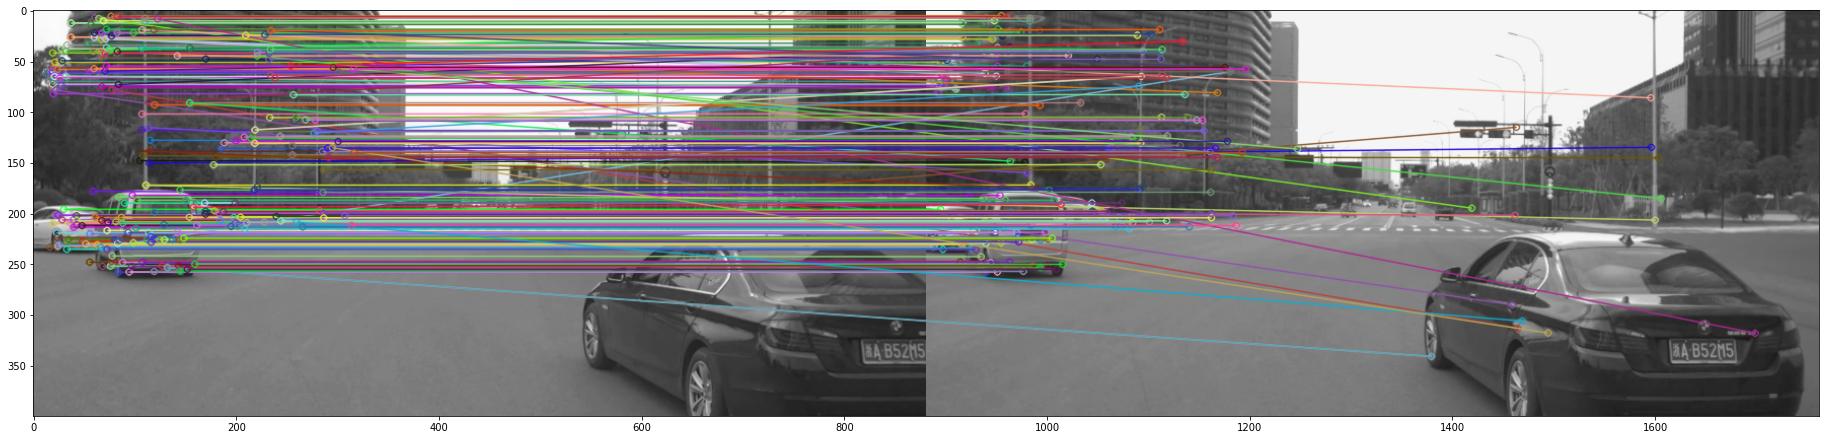

In [58]:
for fname in f[:30]:
    img1 = cv2.imread(os.path.join("images", "left" , fname), 0)
    img2 = cv2.imread(os.path.join("images", "right", fname), 0)

    # figure, ax = plt.subplots(1, 2, figsize=(32, 16))
    # ax[0].imshow(img1, cmap='gray')
    # ax[1].imshow(img2, cmap='gray')

    showImageAndDrawMatches(models[0], img1, img2, max_index=250)

    plt.show()
    sleep
    clear_output(wait=True)


In [41]:
nOctaveLayers = list(range(1, 10))
sigmas = list(range(1, 15))

In [47]:
WTA_Ks = [2, 3, 4]

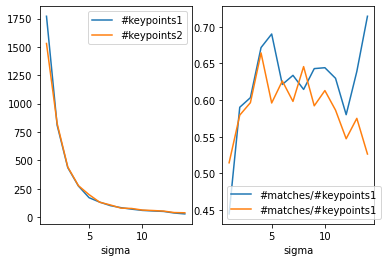

In [66]:
nKeypoints1 = []
nKeypoints2 = []

nRatioMatches1 = []
nRatioMatches2 = []

for sigma in sigmas:
    model = cv2.SIFT_create(sigma=sigma)

    img1 = cv2.imread(os.path.join("images", "left" , f[0]), 0)
    img2 = cv2.imread(os.path.join("images", "right", f[0]), 0)

    keypoints1, descriptors1 = model.detectAndCompute(img1, None)
    keypoints2, descriptors2 = model.detectAndCompute(img2, None)

    nKeypoints1.append(len(keypoints1))
    nKeypoints2.append(len(keypoints2))    

    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

    matches = bf.match(descriptors1, descriptors2)

    nRatioMatches1.append(len(matches)/len(keypoints1))
    nRatioMatches2.append(len(matches)/len(keypoints2))

fig, ax = plt.subplots(1, 2)

ax[0].plot(sigmas, nKeypoints1, label="#keypoints1")
ax[0].plot(sigmas, nKeypoints2, label="#keypoints2")
ax[0].set_xlabel("sigma")
ax[0].legend()

ax[1].plot(sigmas, nRatioMatches1, label="#matches/#keypoints1")
ax[1].plot(sigmas, nRatioMatches2, label="#matches/#keypoints1")
ax[1].set_xlabel("sigma")
ax[1].legend()

plt.show()
    